In [1]:
import nilearn.image, nilearn.decoding

import numpy as np
import pandas as pd

#from sklearn.svm import LinearSVC
#from sklearn.decomposition import PCA
#from sklearn.linear_model import LinearRegression

In [2]:
#!pushd \\10.201.185.39\clmnlab

In [3]:
TM_dir = '/clmnlab/TM'
#TM_dir = 'Z:/TM'
#TM_dir = 'E:/data'

behav_dir = TM_dir + '/behav_data/'
fan_roi_dir = TM_dir + '/fMRI_data/masks/Fan/Fan280/'
stats_dir_11 = TM_dir + '/fMRI_data/stats/Reg11_*/'
sangil_dir = TM_dir + '/fMRI_data/sangil/'

subj_list = ['sub-01','sub-02','sub-03','sub-04','sub-05','sub-06','sub-07',
            'sub-08','sub-09','sub-10','sub-11','sub-12','sub-13','sub-14']

### Fan Masks Labeling

In [4]:
import glob

label_data = TM_dir + '/fMRI_data/masks/Fan/Fan280/fan280_fullname.csv'
fan_roi = pd.read_csv(label_data, header=None)
fan_roi = fan_roi.rename(columns={0: 'label'})

fan_roi_path = sorted(glob.glob(fan_roi_dir + 'fan.roi.resam.*.nii.gz'))
fan_roi_imgs = np.array([nilearn.image.load_img(path) for path in fan_roi_path])
len_roi = fan_roi.shape[0]

for i in range(len(fan_roi_path)):
    row = int(fan_roi_path[i][-10:-7])-1
    #fan_roi.loc[row,'imgs'] = fan_roi_imgs[i]
    fan_roi.loc[row,'nvoxels'] = np.sum(fan_roi_imgs[i].get_fdata()>0,axis=None)

In [5]:
from nilearn import plotting as nplt


num_fan = 65

## fan masks
path_fan = fan_roi_dir + 'fan.roi.resam.%03d.nii.gz' %(num_fan+1)
title_fan = fan_roi.loc[num_fan,'label']

fan_roi.loc[num_fan-5:num_fan+5,['label','nvoxels']]

,label,nvoxels
60,"Lt. precentral gyrus (BA4, tongue and larynx)",432.0
61,"Rt. precentral gyrus (BA4, tongue and larynx)",403.0
62,"Lt. precentral gyrus (BA6, caudal ventrolateral)",742.0
63,"Rt. precentral gyrus (BA6, caudal ventrolateral)",641.0
64,"Lt. paracentral lobule (BA1/2/3, lower limb)",344.0
65,"Rt. paracentral lobule (BA1/2/3, lower limb)",442.0
66,"Lt. paracentral lobule (BA4, lower limb)",465.0
67,"Rt. paracentral lobule (BA4, lower limb)",586.0
68,"Lt. superior temporal gyrus (BA38, medial)",692.0
69,"Rt. superior temporal gyrus (BA38, medial)",640.0


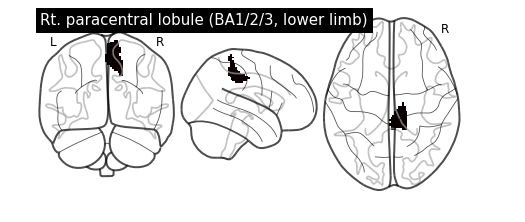

In [6]:
roi = nilearn.image.load_img(path_fan)
nplt.plot_glass_brain(roi,title=title_fan)

# Test

### Compare t-test masks

In [7]:
from nilearn import plotting as nplt

subj = 'TML23'

## whole brain
path_full = TM_dir + '/fMRI_data/masks/full_masks/full_mask.%s.nii.gz' %subj
title_full = 'full_mask.%s.nii.gz' %subj

## Ttest mask
path_tt10 = stats_dir_10 + subj + '/Clust_mask_binary.nii.gz'
roi = nilearn.image.load_img(path_tt10)
temp = roi.get_fdata()

nplt.plot_glass_brain(roi,title='%s, tt10, n(Voxel)=%d'%(subj,len(temp[temp>0])))

## Ttest mask
path_tt11 = stats_dir_11 + subj + '/Clust_mask_binary.nii.gz'
roi = nilearn.image.load_img(path_tt11)
temp = roi.get_fdata()

nplt.plot_glass_brain(roi,title='%s, tt11, n(Voxel)=%d'%(subj,len(temp[temp>0])))

NameError: name 'stats_dir_10' is not defined

### Load the subject's data

## Voxel Analysis

In [ ]:
subj = 'TML23'
run = 1
img = nilearn.image.load_img(stats_dir_11 + '%s/r%02d.LSSout.nii.gz' % (subj, run))
img.shape

In [ ]:
from nilearn import plotting as nplt

subj = 'sub-01'
run = 'run-01'
#Xs, ys, group = get_X_y_group(subj, range(1,7))
path_func = sangil_dir+subj+'/ses-test/func/%s_ses-test_task-livingnonlivingdecisionwithplainormirrorreversedtext_%s_bold.nii.gz'%(subj,run)
bold = nilearn.image.load_img(path_func)
bold.shape

In [ ]:
temp = bold.get_fdata()
temp = temp.reshape(64*64*25,205)
temp.shape

# Import result & Statistics

In [ ]:
dt = pd.read_csv(sangil_dir + subj +
                       '/ses-test/func/%s_ses-test_task-livingnonlivingdecisionwithplainormirrorreversedtext_%s_events.tsv'%(subj,run), sep='\t')
dt

# Principal Component Analysis & Regression